In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
label_encoder = preprocessing.LabelEncoder()

dataFrame = pd.read_excel('preprocessing_amazon.xlsx')

dataFrame.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0


1.  STATISTICS

In [3]:
# Get types of attributes
dataFrame.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings       int64
discount_price    float64
actual_price      float64
dtype: object

In [4]:
# Get the list of main categories:
dataFrame["main_category"].value_counts()

main_category
accessories                62869
women's clothing           60447
tv, audio & cameras        46756
men's clothing             37025
appliances                 25547
men's shoes                24833
stores                     22191
home & kitchen             12524
sports & fitness            8028
beauty & health             6723
kids' fashion               5698
car & motorbike             5156
toys & baby products        4591
bags & luggage              3213
industrial supplies         2592
women's shoes               2435
grocery & gourmet foods     2343
pet supplies                1232
music                        748
home, kitchen, pets           12
Name: count, dtype: int64

In [5]:
# Get the list of sub categories:
dataFrame["sub_category"].value_counts()

sub_category
Clothing                      16940
Bags & Luggage                15961
Men's Fashion                 15615
Ethnic Wear                   15476
Fashion & Silver Jewellery    15020
                              ...  
STEM Toys Store                  43
Fashion Sales & Deals            36
Toys Gifting Store               21
Refurbished & Open Box           12
International Toy Store           4
Name: count, Length: 112, dtype: int64

2. EXPLORATORY DATA ANALYSIS

In [6]:
# Get best-selling product based on the number of ratings.
dataFrame.sort_values(by=['no_of_ratings'], ascending=False).head(10)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
55147,SanDisk 512GB Ultra MicroSDXC UHS-I Memory Car...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/81JkguS-cT...,https://www.amazon.in/SanDisk-512GB-Ultra-Micr...,4.3,589547,8022.0,15000.0
48967,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SanDisk-microSDXC-Memory...,4.3,589547,1705.0,3999.0
53891,SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-4...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/81MZ2WBTrk...,https://www.amazon.in/SanDisk-400GB-MicroSD-SD...,4.3,589547,15600.0,22289.0
49288,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/61q4+cvund...,https://www.amazon.in/SanDisk-Ultra-UHS-I-Memo...,4.3,589547,750.0,1000.0
64112,SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-4...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SanDisk-400GB-MicroSD-SD...,4.3,589547,15600.0,22289.0
49142,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Sandisk-Ultra-Microsdhc-...,4.3,589547,495.0,500.0
56724,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/617NtexaW2...,https://www.amazon.in/SanDisk-microSDXC-Memory...,4.3,589547,1705.0,3999.0
49545,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SanDisk-Ultra-microSD-Me...,4.3,589547,523.0,700.0
50615,SanDisk 256GB Class 10 MicroSD Card with Adapt...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/71Oi92CyW2...,https://www.amazon.in/SanDisk-256GB-Class-Micr...,4.3,589547,3324.0,7999.0
56990,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/814kvapmaa...,https://www.amazon.in/Sandisk-Ultra-Microsdhc-...,4.3,589547,495.0,500.0


In [7]:
# Get worst-selling product based on the number of ratings.
dataFrame.sort_values(by=['no_of_ratings'], ascending=False).tail(10)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
130398,Skechers womens Bay Breeze - Wild Kitten Sandal,women's shoes,Fashion Sandals,https://m.media-amazon.com/images/I/71OPZITq3u...,https://www.amazon.in/Skechers-Womens-Fashion-...,5.0,1,1767.0,2599.0
130392,Inc.5 womens 1203_navy Sandal,women's shoes,Fashion Sandals,https://m.media-amazon.com/images/I/512PPWDCxQ...,https://www.amazon.in/Inc-5-Flat-Fashion-Sanda...,3.0,1,773.0,1990.0
130391,RAI SAHAB Women's Fashion Sandals | Flat Sanda...,women's shoes,Fashion Sandals,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RAI-SAHAB-Fashion-Comfor...,5.0,1,689.0,1999.0
291964,"YUGMI SHOP Push-up Board, 9 in 1 Body Building...",sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71EuNoBv8a...,https://www.amazon.in/YUGMI-SHOP-Building-Equi...,5.0,1,599.0,1299.0
291967,ALLYSON FITNESS 3 Tier Metal Steel Home Workou...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41Q0+O-91H...,https://www.amazon.in/ALLYSON-FITNESS-Workout-...,2.0,1,3999.0,7999.0
291968,Fitcozi Exerciser Rope Cable Attachment with F...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41kRNZNQlP...,https://www.amazon.in/Fitcozi-Exerciser-Cable-...,2.0,1,249.0,599.0
130380,SPOTIC Vegan Leather Elegant Unique Design Tre...,women's shoes,Fashion Sandals,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SPOTIC-Leather-Elegant-A...,1.0,1,1099.0,1699.0
130379,Sponex Sandal For Women and Girls(Size 3 to 9 ...,women's shoes,Fashion Sandals,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Sponex-White-Sandal-Wome...,4.0,1,449.0,799.0
291980,Xyno Finger Grip Stretcher Hand Strengthen Equ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/51Z-ly-biX...,https://www.amazon.in/Stretcher-Strengthen-Equ...,1.0,1,359.0,599.0
296405,Eleven Men's Polyster Black T Shirt & Black Sh...,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/51z8Jduf-3...,https://www.amazon.in/Eleven-Polyster-Black-Sh...,3.0,1,559.0,1299.0


In [8]:
# Label Encoding to numeralize the text data to numeric data
dataFrame['name'] = label_encoder.fit_transform(dataFrame['name']).astype('float64')
dataFrame['main_category'] = label_encoder.fit_transform(dataFrame['main_category']).astype('float64')
dataFrame['sub_category'] = label_encoder.fit_transform(dataFrame['sub_category']).astype('float64')

# Remove two attributes: image and link.
dataFrame = dataFrame.drop(['image', 'link'], axis = 1)

dataFrame.head(10)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0
1,110392.0,1.0,0.0,4.2,2948,46490.0,75990.0
2,110368.0,1.0,0.0,4.2,1206,34490.0,61990.0
3,110375.0,1.0,0.0,4.0,69,37990.0,68990.0
4,42977.0,1.0,0.0,4.1,630,34490.0,67790.0
5,214808.0,1.0,0.0,4.0,1666,31990.0,70990.0
6,117321.0,1.0,0.0,4.2,1097,29999.0,49990.0
7,117327.0,1.0,0.0,4.3,1494,39990.0,67990.0
8,42971.0,1.0,0.0,4.1,674,30990.0,58190.0
9,214825.0,1.0,0.0,4.0,801,37999.0,73990.0


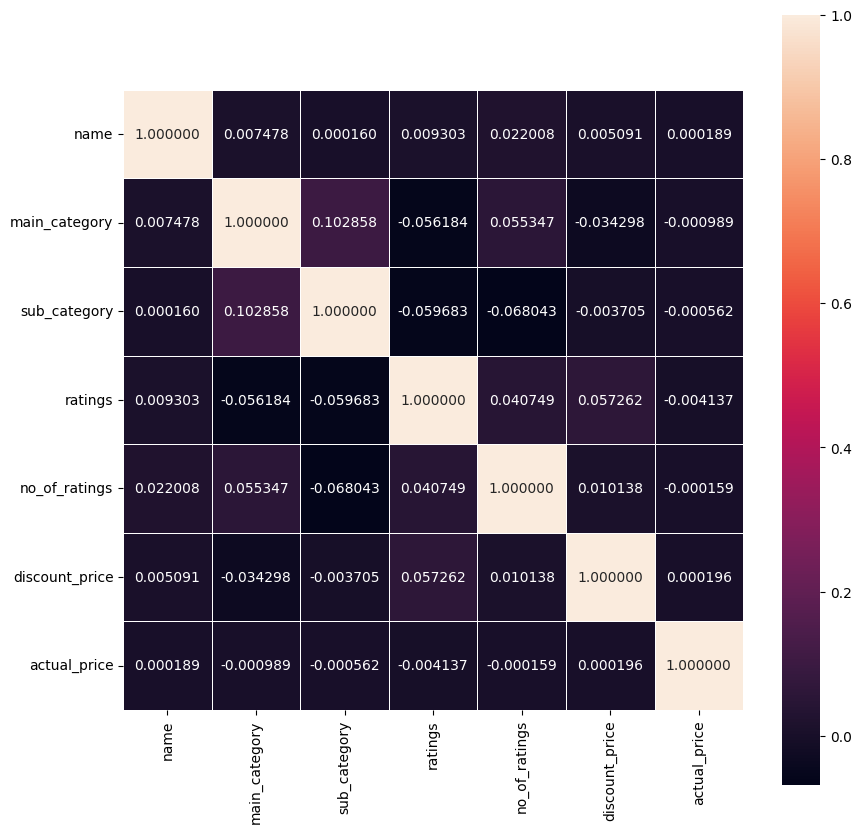

In [9]:
# Correlation among the attributes in the dataset
correlation_matrix = dataFrame.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlation_matrix, vmax = 1, square = True, annot=True,fmt = ".6f", linewidth=.5);

In [10]:
# Get the most expensive products but ratings lower than 3 in scale 10 items.
sub_dataFrame = dataFrame.loc[dataFrame['ratings'] < 3]
sub_dataFrame.sort_values(by=['actual_price'], ascending=False).head(10)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
139740,126571.0,6.0,43.0,2.0,1,589.0,9.900000e+09
305689,110441.0,17.0,98.0,2.7,5,319990.0,3.999900e+05
59559,137569.0,17.0,20.0,2.0,1,273999.0,2.949950e+05
64131,137550.0,17.0,20.0,1.9,2,132103.0,1.649950e+05
305614,110432.0,17.0,98.0,2.8,8,88499.0,1.499900e+05
59585,137584.0,17.0,20.0,1.9,2,116989.0,1.349950e+05
115298,128175.0,0.0,36.0,1.0,1,122254.0,1.327470e+05
197395,128175.0,0.0,62.0,1.0,1,122254.0,1.327470e+05
174721,177270.0,17.0,51.0,2.5,3,88000.0,1.219000e+05
305486,177270.0,17.0,98.0,2.5,3,88000.0,1.219000e+05
